In [4]:
import matplotlib.pyplot as plt
import json
import ibeaconsHelper
import numpy as np
from scipy.optimize import curve_fit
import utils

# old_filenames = ['0', '5', '19', '50', '75', '75-R', '100', '144']
filenames = ['1', '5', '20', '40', '75', '100', '144', '200', '288']
# filenames = ['top', 'left', 'bottom', 'right']
ibeacons_by_timestamp_dict = {}
for filename in filenames:
    with open('indoor-loc/Server/collected_data/ibeacon_calibration/'+ filename +'.json', 'r') as f:
        data = json.load(f)
        ibeacons_by_timestamp_dict[filename] = ibeaconsHelper.get_data_by_timestamp(data)
# print(ibeacons_by_timestamp_dict['1'])

IOError: [Errno 2] No such file or directory: 'indoor-loc/Server/collected_data/ibeacon_calibration/1.json'

In [6]:
plt.figure(figsize=(8,6))
for filename in filenames:
    data = ibeaconsHelper.get_data_from_ibeacon(9, ibeacons_by_timestamp_dict[filename])
    ibeacon_timestamps = list(map(lambda ib: ib.timestamp, data))
    # normalize timestamps
    first_timestamp = ibeacon_timestamps[0]
    ibeacon_timestamps = list(map(lambda time: time - first_timestamp, ibeacon_timestamps))
    ibeacon_rssis = list(map(lambda ib: ib.rssi, data))
    
    plt.plot(ibeacon_timestamps, ibeacon_rssis, label=filename)
plt.legend()
plt.show()

KeyError: '1'

<Figure size 576x432 with 0 Axes>

In [30]:
print([(x, len(y)) for x, y in ibeacons_by_timestamp_dict.items()])

[('top', 57), ('bottom', 56), ('right', 52), ('left', 51)]


In [3]:
median_rssis = []
distances = []

for filename in filenames:
    data = ibeaconsHelper.get_data_from_ibeacon(9, ibeacons_by_timestamp_dict[filename])
    ibeacon_rssis = np.array(map(lambda ib: ib.rssi, data))
    median_rssi = np.median(ibeacon_rssis)
    median_rssis.append(median_rssi)
#     distance = in2m(float(filename))
    distance = float(filename)
    distances.append(distance)

KeyError: '1'

In [147]:
rssi_function = lambda d, n, A: -10 * n * np.log(d) + A

In [148]:
start, end = 1, 6
n, A = curve_fit(rssi_function, distances[start: end], median_rssis[start: end])[0]
print "n:", n
print "A:", A

n: 0.7321926827714955
A: -35.58810484048141


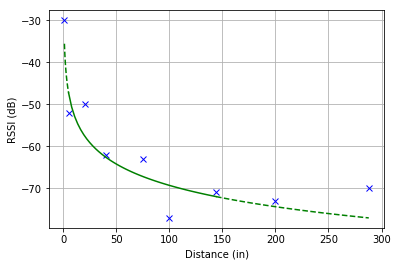

In [149]:
plt.plot(distances, median_rssis, 'x', color='b')

# predicted curve
xs = np.linspace(distances[start], distances[end])
ys = rssi_function(xs, n, A)
plt.plot(xs, ys, color='g')
xs = np.linspace(distances[0], distances[start])
ys = rssi_function(xs, n, A)
plt.plot(xs, ys, '--', color='g')
xs = np.linspace(distances[end], distances[-1])
ys = rssi_function(xs, n, A)
plt.plot(xs, ys, '--', color='g')

# # manually set
# xs = np.linspace(distances[1], distances[-2])
# ys = rssi_function(xs, 2, -77)
# plt.plot(xs, ys, color='r')

plt.grid()
plt.xlabel("Distance (in)")
plt.ylabel("RSSI (dB)")
plt.show()